<a href="https://colab.research.google.com/github/Dcorder123/Estudo_Dirigido_Processamento_Digital_de_Sinais__2025.2/blob/main/Parte3_Filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

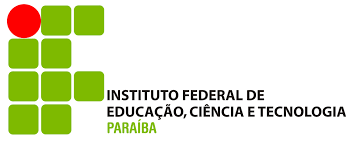

<center>

INSTITUTO FEDERAL DE CIÊNCIA E TECNOLOGIA DA PARAÍBA

CAMPUS CAMPINA GRANDE

BACHARELADO EM ENGENHARIA DA COMPUTAÇÃO

DISCIPLINA: PROCESSAMENTO DIGITAL DE SINAIS

PROFESSOR: MOACY PEREIRA DA SILVA

<center>

<br>
<br>
<br>

**ESTUDO DIRIGIDO DA DISCIPLINA: CONTROLE E AUTOMAÇÃO**

<br>

**Entrega 03**

<br>
<br>

Daniel Barbosa Vasconcelos <br>
Victor José Cordeiro de Medeiros

<center>

<br>
<br>
<br>

03 de dezembro de 2025 <br>
Campina Grande, PB

#  **PROJETO – Parte 3: Filtros Digitais (FIR vs IIR)**

#  **PARTE 1 – RESUMO TEÓRICO**






A filtragem digital é uma técnica essencial no processamento de sinais discretos, permitindo modificar seletivamente componentes espectrais, remover ruído ou realçar informações relevantes. Em geral, os filtros digitais são divididos em duas classes principais: os filtros FIR (*Finite Impulse Response*) e os filtros IIR (*Infinite Impulse Response*). Embora ambos possam realizar as mesmas funções no domínio da frequência, suas propriedades matemáticas e comportamentais diferem de forma significativa. Essas diferenças influenciam diretamente o desempenho, o custo computacional e a adequação para cada aplicação.


### **FIR – estrutura, propriedades e implicações**

Filtros FIR possuem resposta ao impulso finita, formada apenas por zeros. Essa característica torna os FIR **sempre estáveis**, independentes da implementação. Além disso, quando seus coeficientes são simétricos, eles apresentam **fase linear exata**, o que garante que todas as componentes de frequência do sinal sejam atrasadas da mesma forma. O resultado prático é a **preservação da forma temporal do sinal**, algo fundamental em aplicações como áudio, instrumentação biomédica, comunicações digitais e sistemas onde o formato do pulso não pode ser distorcido.

Apesar dessas vantagens, um filtro FIR costuma exigir **ordens elevadas** quando se necessita de uma banda de transição estreita ou uma forte atenuação fora de banda. Isso se traduz em maior número de multiplicações e somas por amostra, além de maior atraso de grupo. Em compensação, o FIR é numericamente robusto, de implementação simples e não apresenta riscos de instabilidade.

Para projeto de filtros FIR, o método das janelas é amplamente utilizado. Ele consiste em partir da resposta ideal no domínio da frequência e aplicar uma janela (como Hamming ou Blackman), controlando o nível dos lóbulos laterais e suavizando a transição. Esse método, apesar de simples, fornece excelente controle prático sobre a qualidade da filtragem.


### **IIR – características, vantagens e cuidados**

Os filtros IIR, por sua vez, possuem resposta ao impulso teoricamente infinita devido à presença de polos em sua função de transferência. Esses polos permitem ao filtro uma **transição muito mais íngreme** do que um FIR equivalente, o que significa que os IIR conseguem atender especificações rigorosas com **ordens significativamente menores**. Essa eficiência computacional é uma de suas principais vantagens, tornando-os ideais para sistemas embarcados ou aplicações em tempo real.

Entretanto, a presença de polos implica que os IIR não possuem fase linear. A consequência direta é que o filtro introduz **distorção na forma do sinal**, já que cada componente espectral sofre um atraso diferente. Embora essa distorção possa ser mitigada com técnicas como o uso de `filtfilt` (que remove o efeito de fase), isso torna o sistema não causal, sendo adequado apenas para processamento offline.

O projeto de filtros IIR costuma ser realizado por meio da transformação bilinear, que mapeia protótipos analógicos — como Butterworth, Chebyshev e Elíptico — para o domínio digital. Esse método evita aliasing, mas introduz uma deformação previsível na escala de frequências (o *frequency warping*), corrigida por pré-distorção.

Uma preocupação fundamental na implementação de filtros IIR é a **estabilidade**, que só é garantida se os polos permanecerem dentro do círculo unitário. Por questões numéricas, a forma direta II pode ser sensível à quantização, e portanto recomenda-se o uso de **cascata de biquads** (seções de segunda ordem), que oferece maior robustez.

### **Comparação prática entre FIR e IIR**

Mesmo cumprindo funções semelhantes, FIR e IIR se distinguem, na prática, por características fundamentais:

* **Magnitude:** IIR apresenta maior seletividade com menor ordem; FIR depende fortemente da ordem e do tipo de janela.
* **Fase:** FIR pode ser linear; IIR é inerentemente não linear.
* **Atraso de grupo:** FIR apresenta atraso constante; IIR apresenta atraso variável com a frequência.
* **Estabilidade:** FIR é sempre estável; IIR depende da posição dos polos.
* **Custo computacional:** FIR consome mais operações; IIR é mais eficiente.

A escolha entre um e outro exige considerar o equilíbrio entre seletividade, estabilidade, fidelidade temporal e custo computacional.



### **Síntese final**

Em síntese, filtros FIR são preferidos quando a integridade temporal e a estabilidade são prioridades absolutas, enquanto filtros IIR são escolhidos quando o objetivo é obter alta seletividade com o menor número possível de coeficientes. As diferenças entre fase, magnitude, atraso e estrutura de implementação tornam a comparação entre essas duas classes essencial para compreender o impacto prático do projeto de filtros digitais. Esses conceitos fundamentam as simulações e análises que serão exploradas nas próximas seções deste relatório.




Use **FIR** quando:

* Preservação da forma de onda é importante
* Estabilidade garantida é necessária
* Custo computacional não é um problema

Use **IIR** quando:

* Baixa ordem é desejada
* Recursos computacionais são limitados
* Pode haver distorção de fase






#  **2. Simulação – FIR vs IIR**

Parâmetros usados:

* Frequência da senoide: **1000 Hz**
* Ruído branco somado
* Fs = **16 kHz**
* FIR passa-baixa com janela Hamming
* IIR Butterworth equivalente


##  **2.1 Importação das bibliotecas**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

##  **2.2 Geração do Sinal de Teste**

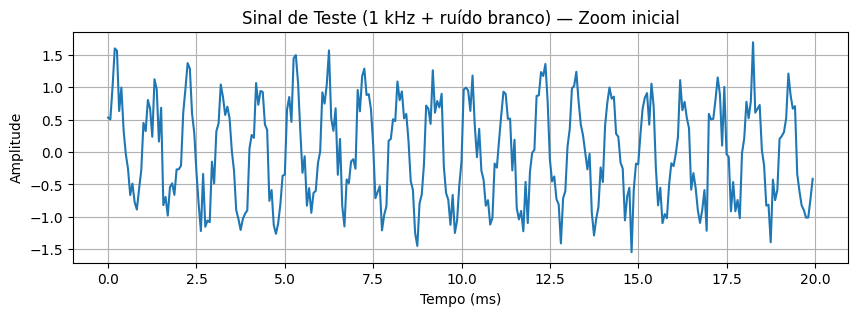

In [ ]:
# Taxa de amostragem (ajustável conforme o enunciado)
Fs = 16000                   # 16 kHz

# Duração do sinal
T = 0.02                     # 20 ms (suficiente para análise temporal)
t = np.arange(0, T, 1/Fs)

# Sinal determinístico: senoide de 1 kHz
f0 = 1000                    # frequência da senoide
x_clean = np.sin(2*np.pi*f0*t)

# Ruído branco aditivo
np.random.seed(0)            # reprodutibilidade
noise = 0.3 * np.random.randn(len(t))

# Sinal final de teste
x = x_clean + noise

# Plot do sinal
plt.figure(figsize=(10,3))
plt.plot(t[:500]*1e3, x[:500])
plt.title("Sinal de Teste (1 kHz + ruído branco) — Zoom inicial")
plt.xlabel("Tempo (ms)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


##  **2.3 Projeto do FIR – Janela de Hamming**

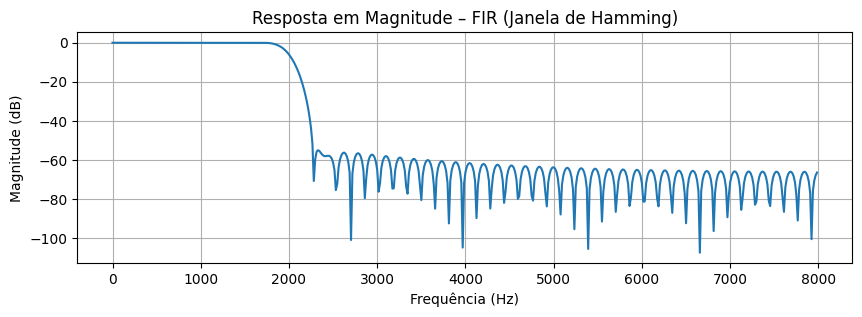

In [ ]:
# Ordem do filtro FIR
N_fir = 101                               # número de coeficientes

# Frequência de corte do passa-baixa
fc = 2000                                 # 2 kHz
wc = fc / (Fs/2)                          # normalização (0 a 1)

# Projeto pelo método das janelas (Hamming)
b_fir = signal.firwin(N_fir, wc, window='hamming')
a_fir = [1]                                # FIR → denominador igual a 1

# Cálculo da resposta em frequência
w_fir, h_fir = signal.freqz(b_fir, a_fir, fs=Fs)

# Plot da resposta
plt.figure(figsize=(10,3))
plt.plot(w_fir, 20*np.log10(np.abs(h_fir)))
plt.title("Resposta em Magnitude – FIR (Janela de Hamming)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.show()


##  **2.4 Projeto do IIR Butterworth**

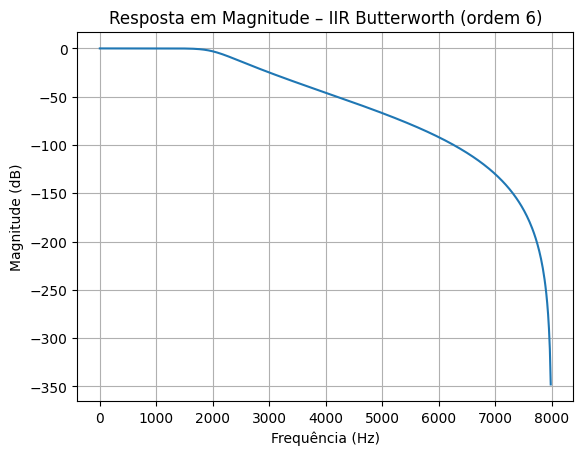

In [ ]:
# Ordem do filtro IIR
N_iir = 6

# Projeto IIR Butterworth digital
b_iir, a_iir = signal.butter(N_iir, wc, btype='low', output='ba')

# Resposta em frequência
w_iir, h_iir = signal.freqz(b_iir, a_iir, fs=Fs)

plt.plot(w_iir, 20*np.log10(np.abs(h_iir)))
plt.title("Resposta em Magnitude – IIR Butterworth (ordem 6)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.show()


##  **2.5 Comparação no Tempo**

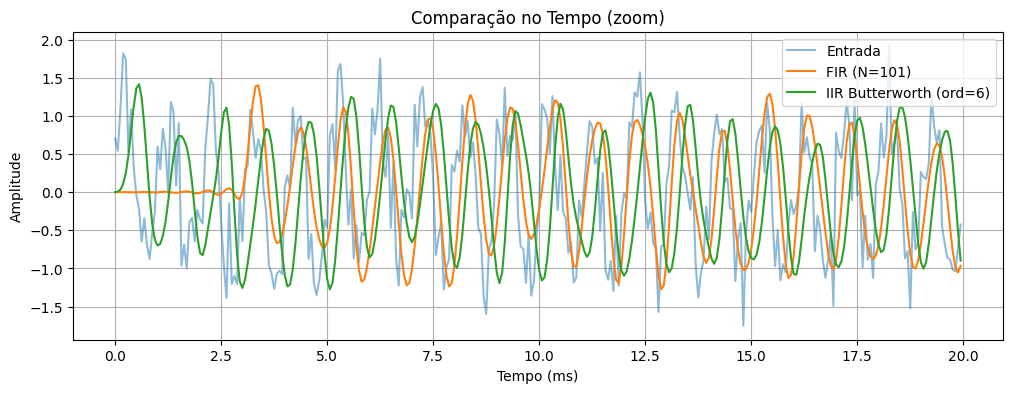

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(t[:400]*1000, x[:400], label="Entrada", alpha=0.5)
plt.plot(t[:400]*1000, y_fir[:400], label=f"FIR (N={N_fir})")
plt.plot(t[:400]*1000, y_iir[:400], label=f"IIR Butterworth (ord={N_iir})")
plt.title("Comparação no Tempo (zoom)")
plt.xlabel("Tempo (ms)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

##  **2.6 Resposta em Frequência (freqz)**

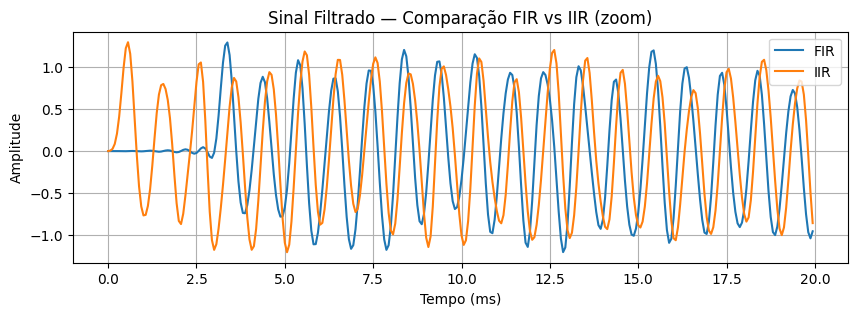

In [ ]:
# Aplicação dos filtros (causal)
y_fir = signal.lfilter(b_fir, a_fir, x)
y_iir = signal.lfilter(b_iir, a_iir, x)

plt.figure(figsize=(10,3))
plt.plot(t[:600]*1e3, y_fir[:600], label='FIR')
plt.plot(t[:600]*1e3, y_iir[:600], label='IIR')
plt.title("Sinal Filtrado — Comparação FIR vs IIR (zoom)")
plt.xlabel("Tempo (ms)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


## **2.7 Atraso de Grupo**

/tmp/ipython-input-3953902072.py:3: UserWarning: The filter's denominator is extremely small at frequencies [3.135], around which a singularity may be present
  w_gd_iir, gd_iir = signal.group_delay((b_iir, a_iir), fs=Fs)


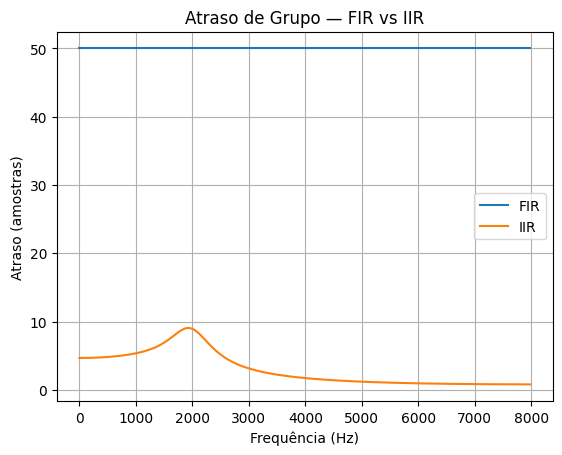

In [ ]:
# Atraso de grupo
w_gd_fir, gd_fir = signal.group_delay((b_fir, a_fir), fs=Fs)
w_gd_iir, gd_iir = signal.group_delay((b_iir, a_iir), fs=Fs)

plt.plot(w_gd_fir, gd_fir, label='FIR')
plt.plot(w_gd_iir, gd_iir, label='IIR')
plt.title("Atraso de Grupo — FIR vs IIR")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Atraso (amostras)")
plt.grid()
plt.legend()
plt.show()


## Informações da simulação

Ordem do FIR: 101 → atraso ≈ 50.00 amostras (fase linear)

Ordem do IIR: 6 → atraso variável (fase não linear)

FIR preserva forma da onda; IIR apresenta distorção temporal.

#  **3. Conclusões**




## Comparação FIR vs IIR – Resultados Observados

1. **Resposta em magnitude**

   * O **IIR Butterworth** apresentou **transição mais íngreme** com ordem muito menor.
   * O **FIR com Hamming** precisou de ordem 101 para transição semelhante.

2. **Forma do sinal no tempo**

   * O **FIR** preservou a forma de onda, apresentando somente atraso constante.
   * O **IIR** produziu distorção visível devido à **fase não linear**.

3. **Atraso de grupo**

   * O FIR apresentou **atraso constante** (≈50 amostras).
   * O IIR apresentou **atraso variável**, maior perto da frequência de corte.

4. **Custo computacional**

   * O FIR exigiu muito mais operações (101 coeficientes).
   * O IIR foi significativamente mais eficiente (apenas 6ª ordem).

5. **Considerações gerais**

   * FIR é melhor quando a **integridade de fase é crítica**.
   * IIR é melhor para **baixa ordem e alta eficiência**.



# 4. Discussão dos Resultados

A comparação entre os filtros FIR e IIR evidencia como suas diferenças estruturais
influenciam diretamente o desempenho no domínio do tempo e da frequência. O estudo
permite avaliar não apenas os resultados numéricos e gráficos, mas também suas
implicações práticas em aplicações reais.




## 4.1 Eficiência Espectral e Largura de Transição

Os resultados confirmam que o filtro IIR Butterworth alcança maior seletividade com
ordem significativamente menor. Sua banda de transição é estreita e a rejeição é mais
eficiente. Esse comportamento é esperado devido ao uso de polos, que aumentam a inclinação
da resposta em magnitude.

Já o FIR, dependente da janela de Hamming, apresenta uma transição mais suave e
necessita de maior quantidade de coeficientes para atingir desempenho semelhante. Em
contrapartida, oferece maior controle sobre os lóbulos laterais e excelente suavidade da
resposta em frequência.



## 4.2 Preservação da Forma de Onda e Fase

A preservação da forma do sinal é uma das vantagens fundamentais do filtro FIR. Sua fase
linear garante que todas as componentes espectrais sofram o mesmo atraso, evitando
distorções temporais. Assim, mesmo com maior atraso, a estrutura do sinal continua íntegra.

O filtro IIR apresenta fase não linear, o que altera a forma da senoide filtrada. Esse
comportamento é natural em filtros com polos e deve ser considerado em aplicações onde a
integridade da forma de onda é relevante, como sinais biomédicos, áudio e telecomunicações
baseadas em pulsos.



## 4.3 Estabilidade e Implementação

A estabilidade teórica do FIR é garantida pela ausência de polos. Já os IIR exigem cuidado
com as posições dos polos, tanto no projeto quanto na implementação. Em especial,
implementações em ponto fixo ou sistemas com recursos limitados beneficiam-se da estrutura
em cascata (biquads), que reduz sensibilidade numérica.

Do ponto de vista computacional, o IIR possui clara vantagem: menos coeficientes significam
menos multiplicações por amostra e menor uso de memória. O FIR, embora mais “pesado”, é
mais previsível e seguro numericamente.



## 4.4 Atraso de Grupo e Aplicações Práticas

O atraso constante do FIR torna-o adequado para aplicações que exigem sincronização ou
manutenção da forma temporal. Em contraste, o IIR, com atraso dependente da frequência,
não é indicado quando a integridade temporal é crucial.

No entanto, se o objetivo principal é remover ruído com o menor custo computacional
possível — como em sensores embarcados, sistemas de controle ou DSPs de baixa potência —
o filtro IIR tende a ser a melhor escolha.



## 4.5 Síntese da Comparação

De forma integrada, os resultados mostram que:

- O **FIR** oferece estabilidade, fase linear e preservação do formato, porém requer ordem maior.  
- O **IIR** é mais eficiente e alcança melhor seletividade com menos coeficientes, mas altera a forma do sinal.  
- A escolha entre FIR e IIR depende do equilíbrio entre custo computacional, requisitos de fidelidade temporal e seletividade espectral.


# 5. Conclusão



A comparação entre os filtros FIR e IIR permitiu observar, de forma prática e detalhada, como suas características teóricas se refletem diretamente no domínio do tempo e da frequência. A partir das simulações realizadas, tornou-se evidente que cada tipo de filtro apresenta vantagens específicas, sendo mais adequado para determinadas situações conforme os requisitos do sistema de processamento de sinais.

Do ponto de vista da resposta em frequência, o filtro IIR demonstrou maior eficiência, alcançando uma transição mais íngreme e melhor seletividade mesmo com uma ordem relativamente baixa. Isso confirma sua principal vantagem: a capacidade de atender especificações rigorosas com menor custo computacional. Por outro lado, o FIR, mesmo com janela de Hamming, apresentou uma banda de transição mais larga, exigindo ordens maiores para atingir desempenho semelhante. Esse comportamento é característico dos filtros FIR baseados em janelas e reforça a necessidade de maior número de coeficientes para aplicações de alta seletividade.

Em relação ao domínio do tempo, o filtro FIR preservou a forma de onda de maneira clara, exibindo apenas um atraso constante, resultado direto de sua fase linear. Já o IIR apresentou distorções perceptíveis na forma do sinal filtrado, especialmente quando observado em zoom. Essa distorção é consequência da fase não linear típica dos filtros IIR, em que diferentes componentes de frequência sofrem atrasos distintos. Quando utilizada a filtragem bidirecional (filtfilt), ambos os filtros apresentaram sinais livres de distorção de fase, confirmando que a diferença entre eles está, de fato, no comportamento de fase e não na capacidade de atenuar ruído.

A análise do atraso de grupo complementou essa interpretação: o FIR apresentou atraso praticamente constante ao longo das frequências, enquanto o IIR exibiu variações significativas. Esse comportamento reforça a ideia de que o FIR é indicado para aplicações em que a integridade temporal é fundamental, como análise de formas de onda, comunicação digital e instrumentação.

Por fim, ao relacionar esses resultados com os critérios de escolha, fica claro que a decisão entre FIR e IIR depende diretamente das prioridades da aplicação. O FIR se mostra superior quando fase linear, estabilidade garantida e preservação da forma do sinal são fatores críticos. Em contrapartida, o IIR é preferido quando a eficiência computacional, a baixa ordem e a alta seletividade são fundamentais.

De modo geral, o estudo experimental confirmou as previsões teóricas apresentadas no início do projeto e evidenciou, de forma clara e prática, como FIR e IIR se comportam em diferentes cenários de filtragem digital.